A question about gaussian filters. Will a simple filter really produce circularly-symmetric smoothing?

In [2]:
import numpy as np
import scipy.signal
np.set_printoptions(threshold=100)
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
smoother = np.zeros((3, 3))
smoother[1, 1] = 0.4
smoother[0, 1] = 0.15
smoother[2, 1] = 0.15
smoother[1, 0] = 0.15
smoother[1, 2] = 0.15

arr = np.zeros((101, 101))
arr[50, 50] = 1
for _ in range(500):
    arr = scipy.signal.convolve2d(arr, smoother, mode='same')
arr *= (255 / arr.max())
arr = arr.astype('uint8')

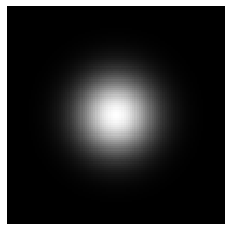

In [40]:
img = Image.fromarray(arr)
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.set_axis_off()

It looks like it, but it's not really a proof. More on this later.

In [51]:
img = Image.open('harbor.jpeg').convert('L')

In [92]:
threshold = 128
arr = np.array(img)[::-1, ::-1]
arr1 = arr
for _ in range(20):
    arr1 = scipy.signal.convolve2d(arr1, smoother, mode='same')

arr[arr < threshold] = 0
arr[arr >= threshold] = 255

arr1[arr1 < threshold] = 0
arr1[arr1 >= threshold] = 255

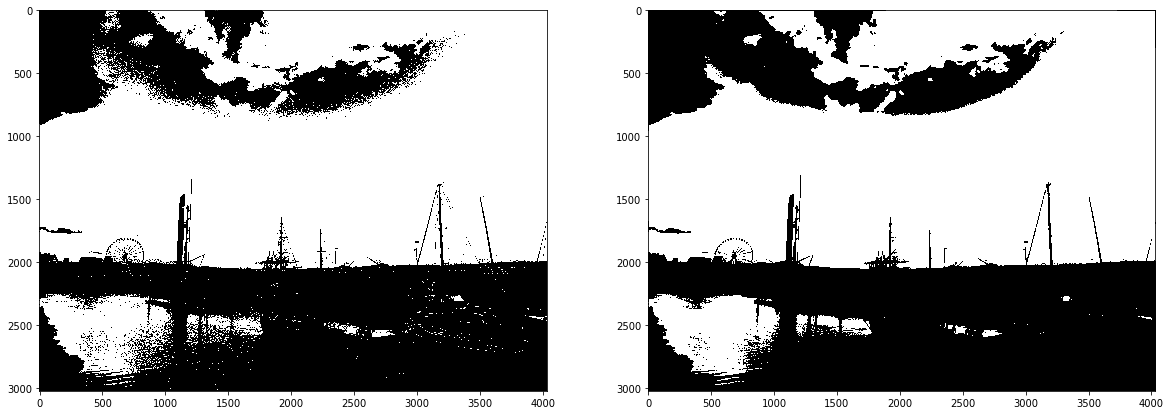

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].imshow(Image.fromarray(arr), cmap='gray')
ax[1].imshow(Image.fromarray(arr1), cmap='gray')

In [60]:
arr

(3024, 4032)